In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [3]:
from xgboost import XGBClassifier

In [4]:
test_data = pd.read_csv("C:/Users/jaimeen/Desktop/ML-II python/mini_project_data/Test Data.csv")
train_data = pd.read_csv("C:/Users/jaimeen/Desktop/ML-II python/mini_project_data/Training Data.csv")

In [5]:
train_data.shape

(252000, 13)

In [6]:
train_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
test_data.isnull().sum()

ID                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [8]:
print(train_data["Married/Single"].unique())
print('\n')
print(train_data['House_Ownership'].unique())
print('\n')
print(train_data['Car_Ownership'].unique())
print('\n')
print(train_data["Profession"].unique())
print('\n')
print(train_data['STATE'].unique())

['single' 'married']


['rented' 'norent_noown' 'owned']


['no' 'yes']


['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']


['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'W

In [9]:
print(test_data["Married/Single"].unique())
print('\n')
print(test_data['House_Ownership'].unique())
print('\n')
print(test_data['Car_Ownership'].unique())
print('\n')
print(test_data["Profession"].unique())
print('\n')
print(test_data['STATE'].unique())

['single' 'married']


['rented' 'owned' 'norent_noown']


['no' 'yes']


['Geologist' 'Firefighter' 'Lawyer' 'Analyst' 'Comedian' 'Economist'
 'Artist' 'Flight attendant' 'Secretary' 'Engineer' 'Technician'
 'Physician' 'Politician' 'Psychologist' 'Scientist' 'Petroleum Engineer'
 'Chartered Accountant' 'Web designer' 'Financial Analyst'
 'Software Developer' 'Official' 'Statistician' 'Drafter' 'Architect'
 'Microbiologist' 'Graphic Designer' 'Designer' 'Army officer'
 'Civil servant' 'Chemical engineer' 'Consultant' 'Air traffic controller'
 'Civil engineer' 'Industrial Engineer' 'Chef' 'Hotel Manager' 'Surveyor'
 'Magistrate' 'Mechanical engineer' 'Computer operator' 'Technical writer'
 'Technology specialist' 'Librarian' 'Surgeon' 'Biomedical Engineer'
 'Design Engineer' 'Aviator' 'Computer hardware engineer'
 'Fashion Designer' 'Dentist' 'Police officer']


['West Bengal' 'Maharashtra' 'Jharkhand' 'Tamil Nadu' 'Haryana' 'Gujarat'
 'Andhra Pradesh' 'Bihar' 'Madhya Pradesh' 'Chhatti

In [10]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
test_data = test_data.drop('CITY', axis = 1)
test_data = test_data.drop('ID', axis = 1)

columns = ['Married/Single',
           'House_Ownership',
           'Car_Ownership',
           'Profession',
           'STATE']

for col in columns:
    test_data[col] = en.fit_transform(test_data[col])

test_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,28,4,13
1,1215004,25,5,1,2,0,24,14,5,10
2,8901342,50,12,1,2,0,30,14,9,14
3,1944421,49,9,0,2,1,1,14,3,12
4,13429,25,18,1,2,1,12,28,13,11


0    221004
1     30996
Name: Risk_Flag, dtype: int64


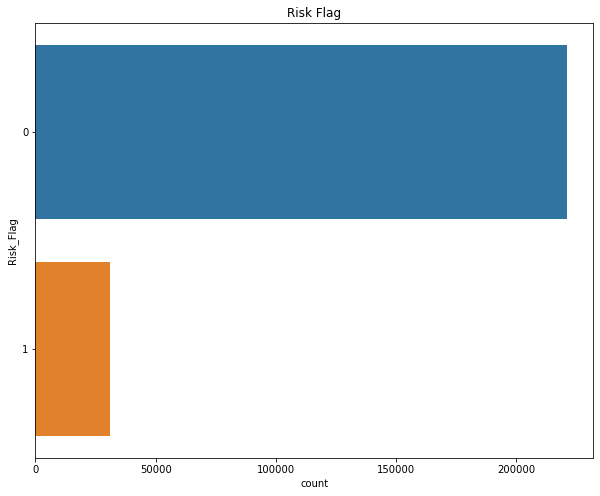

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(y=train_data['Risk_Flag'])
plt.title("Risk Flag")
print(train_data['Risk_Flag'].value_counts())

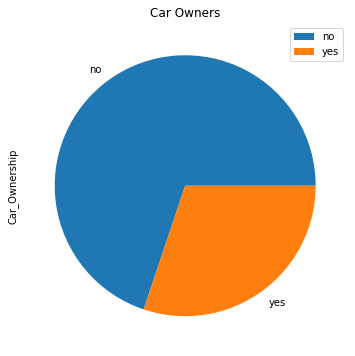

In [12]:
plt.figure(figsize=(10,6))
train_data['Car_Ownership'].value_counts().plot(kind='pie')
plt.title("Car Owners")
plt.legend(loc='upper right')

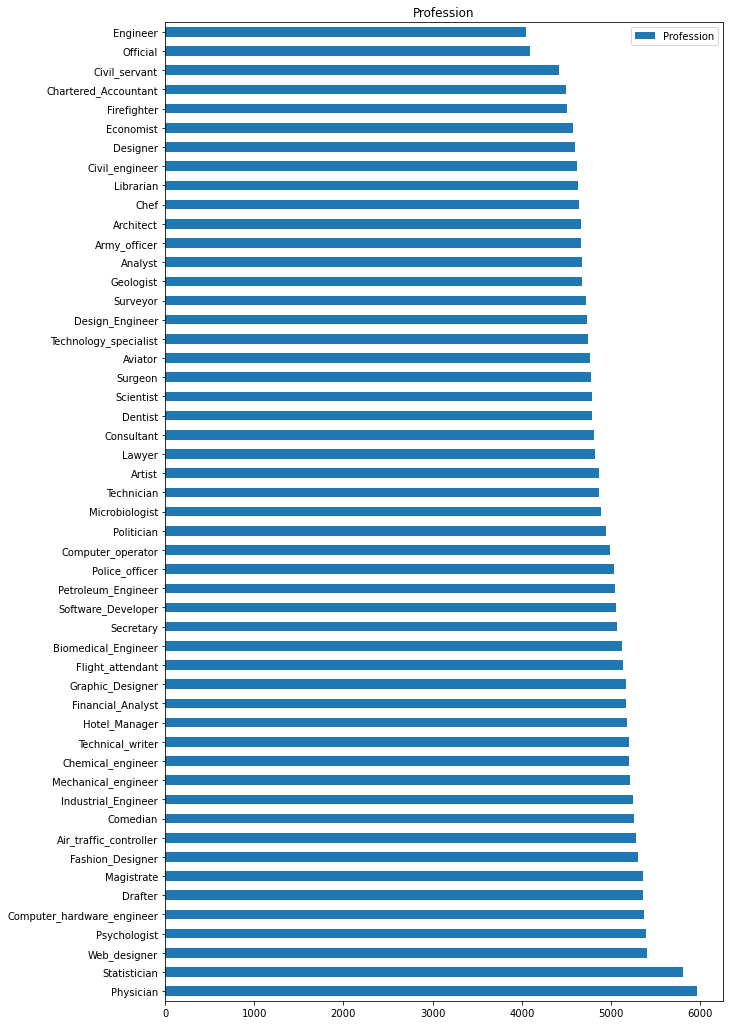

In [13]:
plt.figure(figsize=(10,18))
train_data['Profession'].value_counts().plot(kind='barh')
plt.title('Profession')
plt.legend()

<AxesSubplot:>

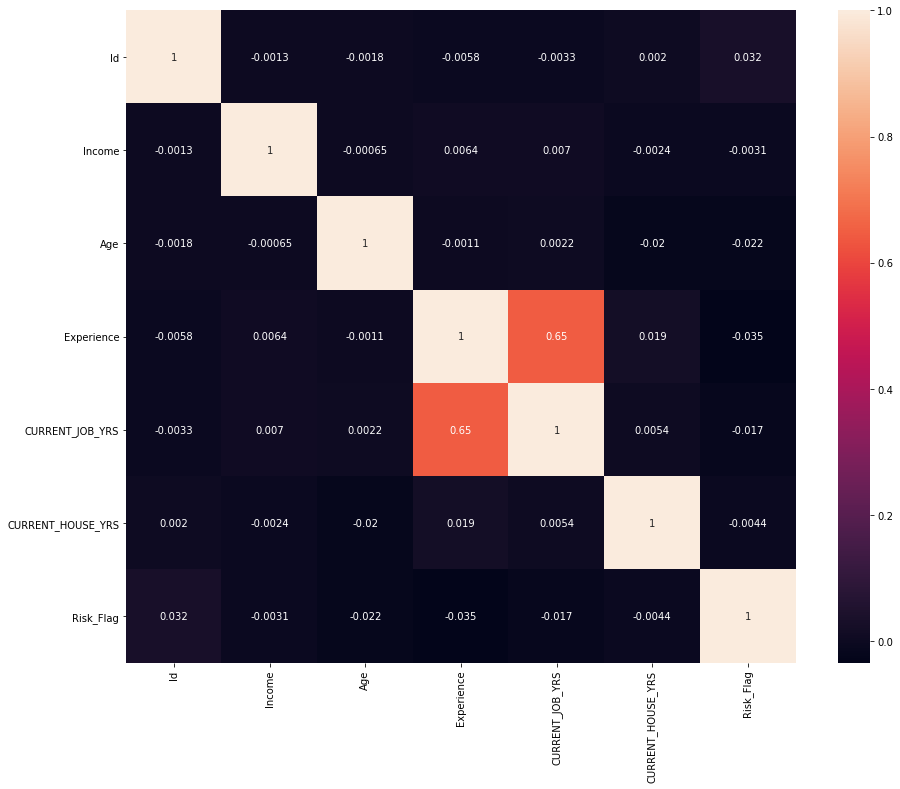

In [14]:
corr = train_data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)

In [15]:
train_data = train_data.drop('CITY', axis = 1)
train_data = train_data.drop('Id', axis = 1)

columns = ['Married/Single',
           'House_Ownership',
           'Car_Ownership',
           'Profession',
           'STATE']

for col in columns:
    train_data[col] = en.fit_transform(train_data[col])

train_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,13,3,13,0
1,7574516,40,10,1,2,0,43,14,9,13,0
2,3991815,66,4,0,2,0,47,12,4,10,0
3,6256451,41,2,1,2,1,43,17,2,12,1
4,5768871,47,11,1,2,0,11,22,3,14,1


In [16]:
df_x = train_data.iloc[:,0:10]
df_y = train_data.iloc[:,-1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=100)

XGB Classifier

In [18]:
clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1000, 
                    use_label_encoder=False,
                    random_state=42)
    
clf.fit(x_train, y_train, eval_metric='logloss')
predictions_1 = clf.predict(x_test) 
print("accuracy_score: " + str(accuracy_score(y_test, predictions_1)))

accuracy_score: 0.8971164021164021


In [19]:
print("ROC AUC score: " + str(roc_auc_score(y_test, predictions_1)))

ROC AUC score: 0.6900195828272088


Desicion Tree

In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
dt.score(x_test,y_test)

0.8823677248677249

In [22]:
dt.score(x_train,y_train)

0.9366609977324263

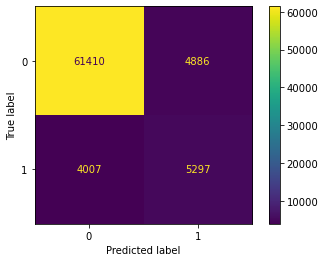

In [23]:
predictDT = dt.predict(x_test)
cm = confusion_matrix(y_test, predictDT)
cmDisplay = ConfusionMatrixDisplay(cm).plot()

Random Forest

In [24]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [25]:
rf.score(x_test, y_test)

0.8991931216931217

In [26]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [27]:
rf.score(x_test,y_test)

0.9005291005291005

In [28]:
from sklearn.metrics import classification_report, roc_curve
predictions_rf = rf.predict(x_test)

print("accuracy_score: " + str(accuracy_score(y_test, predictions_rf)))

print(classification_report(y_test, predictions_rf))

print("ROC AUC score: "+ str(roc_auc_score(y_test, predictions_rf)) )

accuracy_score: 0.9005291005291005
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66296
           1       0.61      0.54      0.57      9304

    accuracy                           0.90     75600
   macro avg       0.77      0.74      0.76     75600
weighted avg       0.90      0.90      0.90     75600

ROC AUC score: 0.7437076024034993


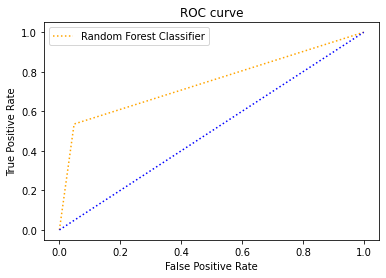

In [29]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions_rf, pos_label =1)

#roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle = ':', color = "orange", label = "Random Forest Classifier")
plt.plot(p_fpr, p_tpr, linestyle = ':', color = "blue")

plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc = "best")

plt.show()

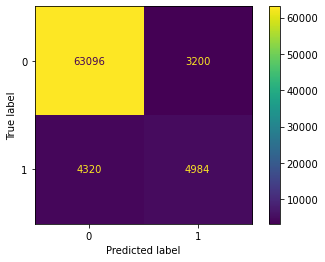

In [30]:
cm = confusion_matrix(y_test, predictions_rf)
cmDisplay = ConfusionMatrixDisplay(cm).plot()

Bagging

In [31]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [32]:
bg.score(x_test,y_test)

0.8994179894179894

In [33]:
bg.score(x_train,y_train)

0.9219727891156463

Boosting

In [34]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=5)

In [35]:
adb.score(x_test,y_test)

0.882526455026455

In [36]:
adb.score(x_train,y_train)

0.9366609977324263

Voting Classifier - Multiple Model Ensemble 

In [37]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [38]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')


In [39]:
evc.fit(x_train.iloc[1:100000],y_train.iloc[1:100000])

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [40]:
evc.score(x_test, y_test)

0.8769312169312169

In [41]:
predictions = evc.predict(test_data)

predictions = pd.DataFrame(predictions)

In [42]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
data_3 = pd.read_csv("C:/Users/jaimeen/Desktop/ML-II python/mini_project_data/Sample Prediction Dataset.csv")
data_3.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [44]:
acc = accuracy_score(data_3['risk_flag'], predictions)
acc

0.8716785714285714